In [1]:
import os
import numpy as np
import pandas as pd
# from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns


### Load Data

<bound method DataFrame.info of                 id  target                              file_path
0       00000e74ad       1  ../../data/train/0/0/0/00000e74ad.npy
1       00001f4945       0  ../../data/train/0/0/0/00001f4945.npy
2       0000661522       0  ../../data/train/0/0/0/0000661522.npy
3       00007a006a       0  ../../data/train/0/0/0/00007a006a.npy
4       0000a38978       1  ../../data/train/0/0/0/0000a38978.npy
...            ...     ...                                    ...
559995  ffff9a5645       1  ../../data/train/f/f/f/ffff9a5645.npy
559996  ffffab0c27       0  ../../data/train/f/f/f/ffffab0c27.npy
559997  ffffcf161a       1  ../../data/train/f/f/f/ffffcf161a.npy
559998  ffffd2c403       0  ../../data/train/f/f/f/ffffd2c403.npy
559999  fffff2180b       0  ../../data/train/f/f/f/fffff2180b.npy

[560000 rows x 3 columns]>
<bound method DataFrame.info of                 id  target                             file_path
0       00005bced6     0.5  ../../data/test/0/0/0/0

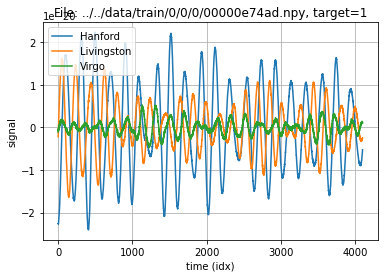

In [3]:

# Following load code adapted from:
#  https://www.kaggle.com/xuzongniubi/g2net-efficientnet-b7-baseline-training

train = pd.read_csv('../../data/training_labels.csv')
test = pd.read_csv('../../data/sample_submission.csv')

def get_train_file_path(image_id):
    return "../../data/train/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

def get_test_file_path(image_id):
    return "../../data/test/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

train['file_path'] = train['id'].apply(get_train_file_path)
test['file_path'] = test['id'].apply(get_test_file_path)

print(train.info)
print(test.info)

print(train.head())
print(test.head())

# Let's plot the time series from the first training example
print('First example')
print(train.iloc[1][2])
data = np.load(train.loc[4, 'file_path'])

print(type(data))
print(data.shape)
print(data.dtype)
print(data.strides)
print(data.data)
print(data)

plt.figure(1)
plt.clf()
idx = range(0, 4096)
#for series in range(3):
#    plt.plot(idx, data[series][:])
plt.plot(idx, data[0][:], label='Hanford')
plt.plot(idx, data[1][:], label='Livingston')
plt.plot(idx, data[2][:], label='Virgo')

plt.xlabel('time (idx)')
plt.ylabel('signal')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('File: ' + train.iloc[0][2] + ', target=' + str(train.iloc[0][1]))


# print('Second example')
# print(train.iloc[1][2])
# data = np.load(train.iloc[1][2])

# plt.figure(2)
# plt.clf()
# idx = range(0, 4096)
# #for series in range(3):
# #    plt.plot(idx, data[series][:])
# plt.plot(idx, data[0][:], label='Hanford')
# plt.plot(idx, data[1][:], label='Livingston')
# plt.plot(idx, data[2][:], label='Virgo')

# plt.xlabel('time (idx)')
# plt.ylabel('signal')
# plt.grid(True)
# plt.axis('tight')
# plt.legend(loc='upper left')
# plt.title('File: ' + train.iloc[1][2] + ', target=' + str(train.iloc[1][1]))

plt.show()

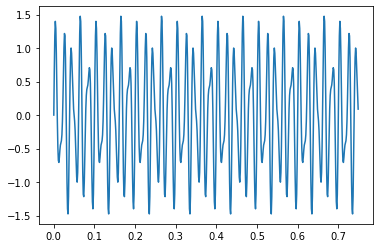

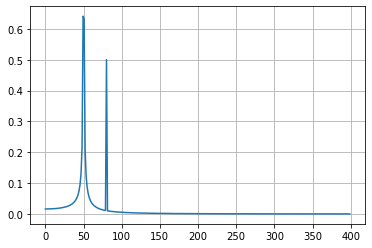

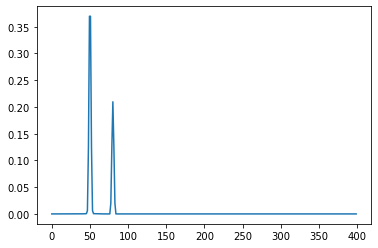

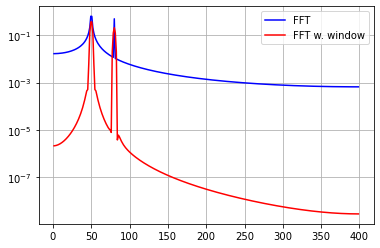

In [22]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x, y)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

#Apply windowing
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
# xf = fftfreq(N, T)[:N//2]
plt.figure()
plt.plot(xf, 2.0/N * np.abs(ywf[0:N//2]))
plt.figure()
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

(4096,)
(4096,)
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5]
(50,)


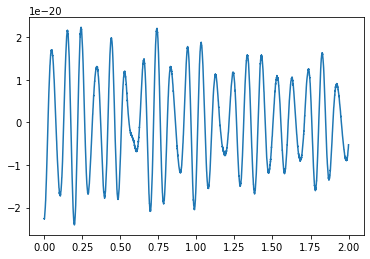

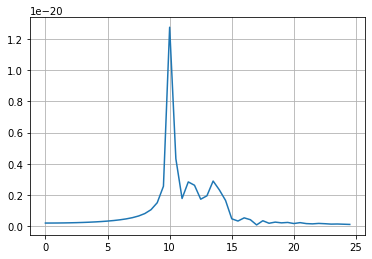

In [23]:
N = 4096
T = 1.0 / 2048.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = data[0]
print(np.shape(x))
print(np.shape(y))
plt.plot(x, y)
yf = fft(y)
xf = fftfreq(N, T)[:50]#N//2]
print(xf)
print(np.shape(xf))
plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[0:50]))#N//2]))
plt.grid()
plt.show()

# gwpy

Most or all from https://colab.research.google.com/github/gw-odw/odw-2021/blob/master/Tutorials/Day_1/Tuto%201.3%20Q-transforms%20with%20GWpy.ipynb

E:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\gwpy\plot\plot.py:279: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


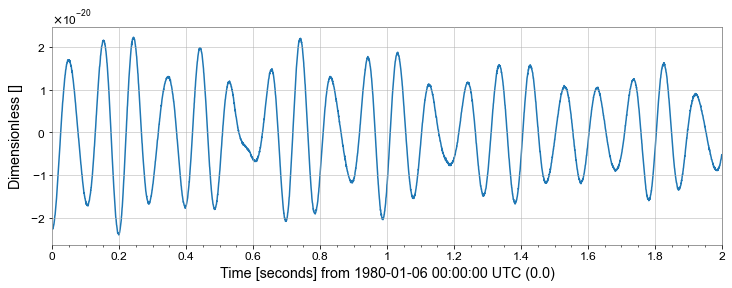

In [24]:
from astropy.units import imperial
from gwpy.timeseries import TimeSeries
# ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
# print(ldata)
tseries0 = TimeSeries(data[0], sample_rate=2048)
tseries1 = TimeSeries(data[1], sample_rate=2048, t0=2)
tseries2 = TimeSeries(data[2], sample_rate=2048, t0=4)
tseries_stack = TimeSeries(np.hstack(data), sample_rate=2048)
plot = tseries0.plot()
ax = plot.gca()
ax.set_xlim(0, 2)
# print(plot.get_xlim())
plot.show()

9.309799055722795e-25 1 / Hz(1/2)
4.883906095392739e-21 1 / Hz(1/2)


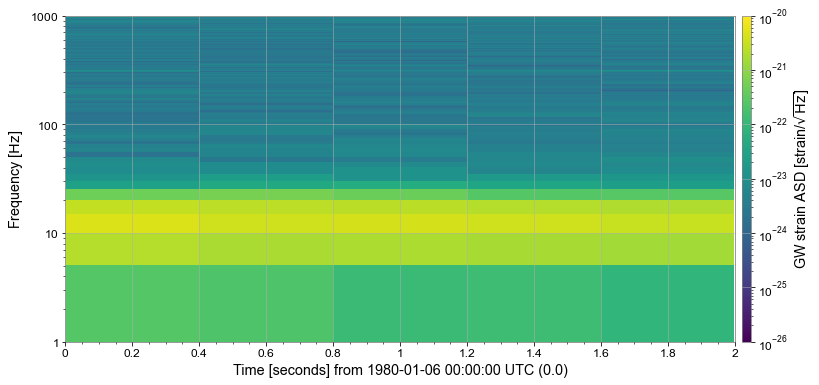

In [186]:
# From https://gwpy.github.io/docs/stable/spectrogram/index.html
specgram = tseries0.spectrogram(0.4, fftlength=0.2, overlap=0.1, window='hann') ** (1/2.)
print(specgram.min())
print(specgram.max())
plot = specgram.plot(norm='log', vmin=1e-26, vmax=1e-20)
ax = plot.gca()
ax.set_ylim(1, 1000)
ax.set_yscale('log')
ax.colorbar(label='GW strain ASD [strain/$\sqrt{\mathrm{Hz}}$]')
plot.show()

In [187]:
print(data.shape)
print(data[0, :4])
print(data[1, :4])
print(data[2, :4])
print(np.hstack(data)[:10])

(3, 4096)
[-2.26507773e-20 -2.26824133e-20 -2.25903500e-20 -2.26216807e-20]
[-2.15955645e-21 -1.40929943e-21 -1.12841005e-21 -6.64446647e-22]
[-1.08335506e-21 -4.39757865e-22 -8.44554026e-22 -3.95502353e-22]
[-2.26507773e-20 -2.26824133e-20 -2.25903500e-20 -2.26216807e-20
 -2.26552281e-20 -2.24274906e-20 -2.23378373e-20 -2.20486232e-20
 -2.19394588e-20 -2.16271775e-20]


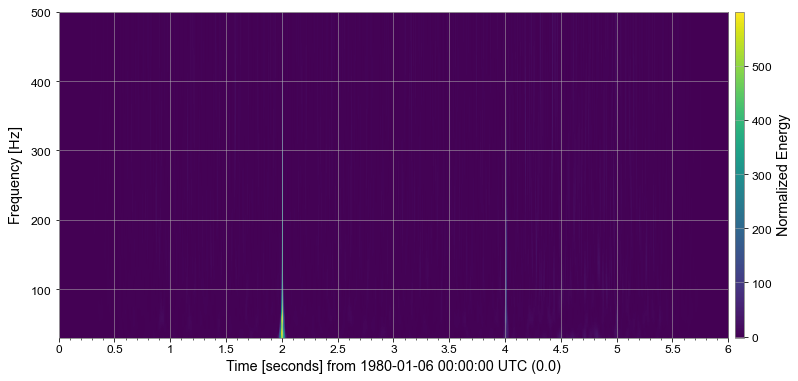

In [188]:
# Try a Q transform
qt = tseries_stack.q_transform(frange=(30,500))
plot = qt.plot()
plot.colorbar(label="Normalized Energy")

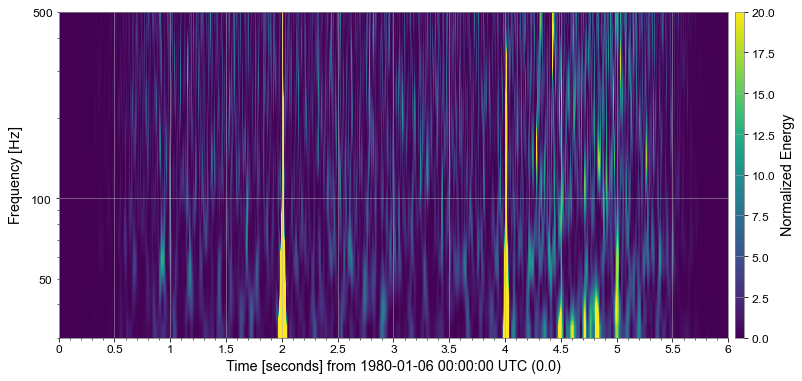

In [189]:
ax = plot.gca()
# ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot.colorbars[0].mappable.set_clim(0,20)
plot  # refresh

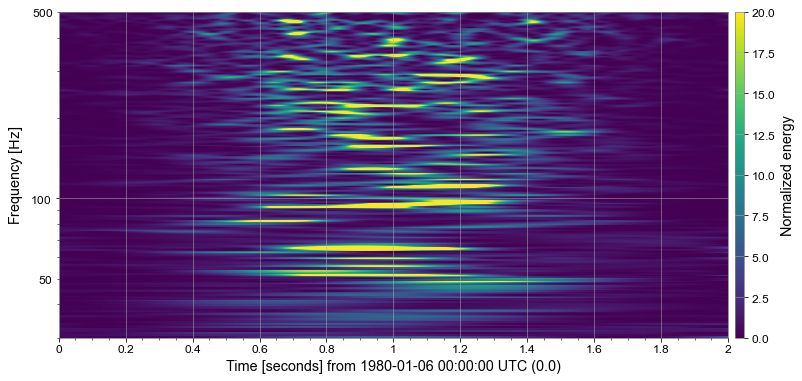

In [195]:
qt2 = tseries0.q_transform(frange=(30, 500), qrange=(100, 110))
plot = qt2.plot()
ax = plot.gca()
# ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalized energy")
plot.colorbars[0].mappable.set_clim(0,20)

### Side-by-side data

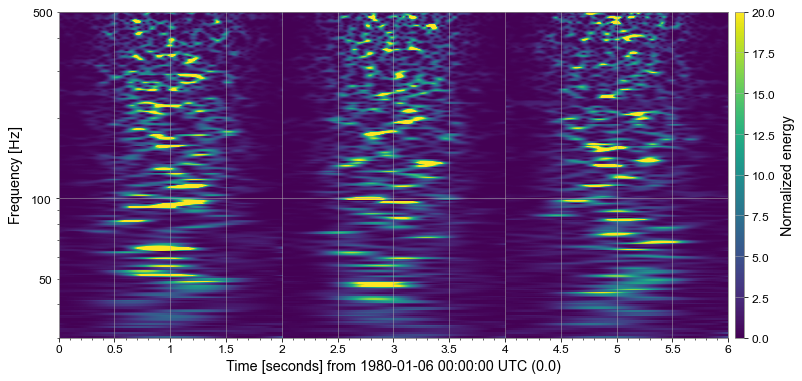

In [216]:
qt_stack = tseries0.q_transform(frange=(30, 500), qrange=(100, 110))
qt_stack.append(tseries1.q_transform(frange=(30, 500), qrange=(100, 110)))
qt_stack.append(tseries2.q_transform(frange=(30, 500), qrange=(100, 110)))
plot = qt_stack.plot()
ax = plot.gca()
# ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalized energy")
plot.colorbars[0].mappable.set_clim(0,20)

In [226]:
print(qt_stack.shape)
foo = np.array(qt_stack)
print(type(foo))
print(foo.shape)

(3000, 940)
<class 'numpy.ndarray'>
(3000, 940)


### 3-Channel data

Type = <class 'numpy.ndarray'>, shape = (1, 1000, 940, 3)


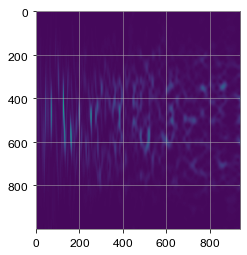

In [59]:
qt_channels = np.zeros((1, 1000, 940, 3))
qt0 = tseries0.q_transform(frange=(30, 500), qrange=(100, 110))
qt1 = tseries1.q_transform(frange=(30, 500), qrange=(100, 110))
qt2 = tseries2.q_transform(frange=(30, 500), qrange=(100, 110))

qt_channels[0] = np.stack((qt0.value.tolist(), qt1.value.tolist(), qt2.value.tolist()), axis=-1)

print(f'Type = {type(qt_channels)}, shape = {qt_channels.shape}')

# print(qt_channels[0,0,0,0])
# print(qt_channels[0,0,0,1])
# print(qt_channels[0,0,0,2])

# print(qt0[0,0])
# print(qt1[0,0])
# print(qt2[0,0])

plt.imshow(qt_channels[0,:,:,0])
plt.show()

# Build CNN

Following tutorial here: https://www.tensorflow.org/tutorials/images/cnn

In [49]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [50]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Build Model

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32, (10, 10), activation='relu', input_shape=(1000, 940, 3)))
model.add(layers.MaxPooling2D((6, 6)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 991, 931, 32)      9632      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 165, 155, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 163, 153, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 81, 76, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 79, 74, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 374144)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### Compile and Train Model

In [52]:
train_labels.shape

(50000, 1)

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(qt_channels, train_labels[0], epochs=10)#, 
#                     validation_data=(test_images, test_labels))

Epoch 1/10
1/1 [==============================] - 28s 28s/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 28ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 26ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 29ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 28ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 23ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 24ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 24ms/step - loss: nan - accuracy: 0.0000e+00


### Evaluate Model

KeyError: 'val_accuracy'

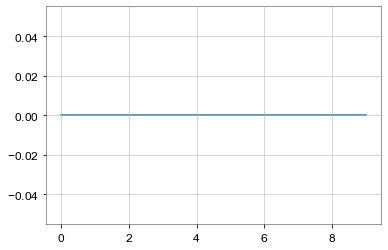

In [61]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)